conflicting time sync for radical.entk.wfprocessor.0000-obj.prof        (mcewan.engr.rutgers.edu:128.6.238.207):     -41.08 -     -42.13 =  1.05
conflicting time sync for radical.entk.appmanager.0000.prof             (mcewan.engr.rutgers.edu:128.6.238.207):     -41.08 -     -42.13 =  1.05
conflicting time sync for radical.entk.task_manager.0000-obj.prof       (mcewan.engr.rutgers.edu:128.6.238.207):     -41.08 -     -42.13 =  1.05
conflicting time sync for radical.entk.wfprocessor.0000-obj.prof        (mcewan.engr.rutgers.edu:128.6.238.207):     -41.08 -     -42.13 =  1.05
conflicting time sync for radical.entk.appmanager.0000.prof             (mcewan.engr.rutgers.edu:128.6.238.207):     -41.08 -     -42.13 =  1.05
conflicting time sync for radical.entk.task_manager.0000-obj.prof       (mcewan.engr.rutgers.edu:128.6.238.207):     -41.08 -     -42.13 =  1.05
conflicting time sync for radical.entk.wfprocessor.0000-obj.prof        (mcewan.engr.rutgers.edu:128.6.238.207):     -41.08 -     

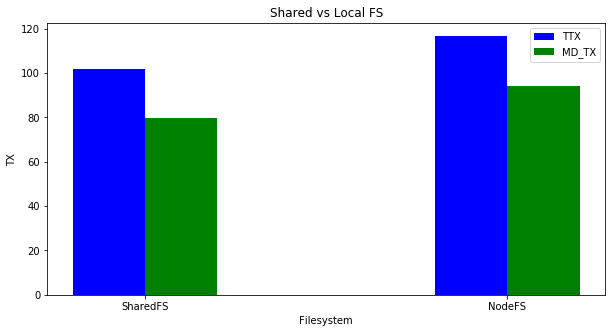

In [44]:
import os
import sys
import glob
import pprint
import radical.utils as ru
import radical.pilot as rp
import radical.entk as re
import radical.analytics as ra
import pickle
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


sessionnames = [
               're.session.mcewan.engr.rutgers.edu.scm177.017750.0013', 
               're.session.mcewan.engr.rutgers.edu.scm177.017750.0015', 
                ]

TTX = []  

wd = os.getcwd() 

#print wd

def gettimes(sessionname):
    
    
    session = ra.Session(sid   = sessionname,
                         stype = 'radical.entk',
                         src   = wd)


    total                   = session.filter(etype='task', inplace=False)
    total_durations         = total.duration([re.states.SCHEDULED, re.states.DONE])
    TTX.append(total_durations)

for i in range(2):    
    gettimes(sessionnames[i])
    
    
t1  = np.asarray(TTX)
#print t1

MDTX = []  
EXTX=[]
def gettimes(sessionname):
    
    
    session = ra.Session(sid   = sessionname,
                         stype = 'radical.entk',
                         src   = wd)

    with open('MDLIST_%s'%sessionname, 'rb') as mdlist:
        md_task_list=pickle.load(mdlist)
    md                   = session.filter(etype='task', inplace=False, uid=md_task_list)
    md_durations         = md.duration([re.states.SUBMITTED, re.states.COMPLETED])
    MDTX.append(md_durations)
    
t2 = np.asarray(MDTX)    

for i in range(2):    
    gettimes(sessionnames[i])

fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(2)
bar_width = 0.2


set1 = ax.bar(index, TTX, bar_width, color='b', label='TTX')
set2 = ax.bar(index+bar_width, MDTX, bar_width, color='g', label='MD_TX')

ax.set_xlabel('Filesystem')
ax.set_ylabel('TX')
#ax.ylim(ymin=60, ymax=120)
ax.set_title('Shared vs Local FS')
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(('SharedFS', 'NodeFS'))
ax.legend()
plt.show()